# Exploratory Data 
## Lisa

In [156]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")
import re
import math
import urllib2
import json

In [157]:
updated_data=pd.read_csv("./tempdata/df_all_cleaned4.csv")
updated_data.head()

,Unnamed: 0,acousticness,analysis_url,artist_discovery,artist_discovery_rank,artist_familiarity,artist_familiarity_rank,artist_hotttnesss,artist_hotttnesss_rank,artist_id,artist_location,artist_name,audio_md5,audio_summary,danceability,duration,energy,id,index,key,liveness,loudness,mode,song_currency,song_currency_rank,song_discovery,song_discovery_rank,song_hotttnesss,song_hotttnesss_rank,song_type,speechiness,tempo,time_signature,title,valence,date,first_ranking,lower_title,lower_artist,year,band_singer,ranking,song,songurl,url,billboard_year,billboard_week,latitude,longitude,location,location_lower
0,0,0.023664,http://echonest-analysis.s3.amazonaws.com/TR/P...,0.369704,NaN,0.673539,NaN,0.588086,NaN,ARN7POH1187B9B301E,"{u'latitude': 32.576489, u'location': u'Abilen...",Jessica Simpson,510d03f7f7773ffe84bd6365e75dfc45,"{u'key': 4, u'analysis_url': u'http://echonest...",0.644058,232.59955,0.872039,SOZYMAL14B5D7A5698,2,4,0.033556,-9.151,0,0.006367,NaN,0.000000,NaN,0.355779,NaN,"[studio, electric, vocal]",0.044870,130.180,4,I Wanna Love You Forever,0.626382,2000-01-01,3,i wanna love you forever,jessica simpson,2000,Jessica Simpson,56,I Wanna Love You Forever,/wiki/I_Wanna_Love_You_Forever,/wiki/Jessica_Simpson,2000,5,32.576489,-99.665323,"Abilene, TX","abilene, tx"
1,1,0.046606,http://echonest-analysis.s3.amazonaws.com/TR/7...,0.299033,437039,0.811461,83,0.654229,1358,AR30R5E1187B9AD78A,"{u'latitude': 40.736101, u'location': u'Newark...",Whitney Houston,24aa3d1259e3480900721571bc4fe8d6,"{u'key': 0, u'analysis_url': u'http://echonest...",0.660295,258.09288,0.847010,SOPBEQQ12B0B80B9BD,3,0,0.066933,-6.398,1,0.028660,24931,0.002068,1561470,0.461754,9856,"[studio, electric, vocal]",0.037339,134.980,4,My Love Is Your Love,0.510183,2000-01-01,4,my love is your love,whitney houston,2000,Whitney Houston,47,My Love Is Your Love,/wiki/My_Love_Is_Your_Love_(song),/wiki/Whitney_Houston,2000,5,40.736101,-74.225090,"Newark, NJ","newark, nj"
2,2,0.240021,http://echonest-analysis.s3.amazonaws.com/TR/r...,0.453046,30544,0.561868,5061,0.596687,2763,AR6JVK31187FB58FE3,"{u'latitude': 45.05, u'location': u'Turin, Ita...",Eiffel 65,NaN,"{u'key': 7, u'analysis_url': u'http://echonest...",0.812507,210.18667,0.971241,SOOAIRU146168415C1,12,7,0.386530,-6.810,0,0.055708,11236,0.006311,567371,0.471915,8139,"[studio, electric, vocal]",0.052639,127.982,4,Blue (Da Ba Dee),0.795222,2000-01-01,13,blue (da ba dee),eiffel 65,2000,Eiffel 65,49,Blue (Da Ba Dee),/wiki/Blue_(Da_Ba_Dee),/wiki/Eiffel_65,2000,5,45.050000,7.666667,"Turin, Italy","turin, italy"
3,3,0.161116,http://echonest-analysis.s3.amazonaws.com/TR/O...,0.416272,NaN,0.542365,NaN,0.532190,NaN,ARM8DAD1187B993E2E,"{u'latitude': 26.0657, u'location': u'Davie, F...",Guy,a533657e04f50cb451677695ce32c756,"{u'key': 1, u'analysis_url': u'http://echonest...",0.833038,281.56757,0.337699,SOQSRPK13E90787CD5,18,1,0.185389,-16.155,1,0.000000,NaN,0.000000,NaN,0.000000,NaN,"[studio, electric, vocal]",0.151720,101.108,4,Dancin',0.705580,2000-01-01,19,dancin',guy,NaN,NaN,NaN,NaN,NaN,NaN,2000,5,26.065700,-80.234900,"Davie, FL, US","davie, fl, us"
4,4,0.562595,http://echonest-analysis.s3.amazonaws.com/TR/j...,0.487270,5662,0.417185,31892,0.521144,11716,AR8VNGZ1187FB4168D,"{u'latitude': 43.6486, u'location': u'Toronto,...",LEN,6ab709aba3e5f7f1b7bf1892307d7c89,"{u'key': 4, u'analysis_url': u'http://echonest...",0.580348,203.04934,0.680611,SOAEYTC144D7F51291,19,4,0.579321,-19.717,1,0.045766,15729,0.000000,NaN,0.508462,4178,"[studio, vocal]",0.068707,96.171,4,Steal My Sunshine,0.729627,2000-01-01,20,steal my sunshine,len,NaN,NaN,NaN,NaN,NaN,NaN,2000,5,43.648600,-79.385300,"Toronto, Ontario, CA","toronto, ontario, ca"


In [3]:
all_05_14=pd.read_csv("./tempdata/all_05_14.csv")
all_05_14.head()

,Unnamed: 0,acousticness,analysis_url,artist_discovery,artist_discovery_rank,artist_familiarity,artist_familiarity_rank,artist_hotttnesss,artist_hotttnesss_rank,artist_id,artist_location,artist_name,audio_md5,audio_summary,danceability,duration,energy,id,index,key,liveness,loudness,mode,song_currency,song_currency_rank,song_discovery,song_discovery_rank,song_hotttnesss,song_hotttnesss_rank,song_type,speechiness,tempo,time_signature,title,valence,year,band_singer,ranking,song,songurl,url
0,0,0.091430,http://echonest-analysis.s3.amazonaws.com/TR/e...,0.359701,221738,0.822827,64,0.814542,189,ARKSZW81187B9B695D,"{u'latitude': 40.714269, u'location': u'New Yo...",Mariah Carey,6671e02f970764a0a0cd19a334b62b8a,"{u'time_signature': 5, u'analysis_url': u'http...",0.609242,261.73624,0.616778,SOORURB14D63A4D714,10,11,0.328686,-10.025,0,0.078954,5721,0.000000,NaN,0.542015,2246,"[studio, electric, vocal]",0.267907,123.507,5,We Belong Together,0.651922,2005,Mariah Carey,1,We Belong Together,/wiki/We_Belong_Together_(Mariah_Carey_song),/wiki/Mariah_Carey
1,1,0.388179,http://echonest-analysis.s3.amazonaws.com/TR/v...,0.403619,109354,0.775424,189,0.800312,238,ARVBRGZ1187FB4675A,"{u'latitude': 33.870292, u'location': u'Fuller...",Gwen Stefani,NaN,"{u'time_signature': 4, u'analysis_url': u'http...",0.915552,199.85333,0.910087,SONVOXZ144F507BAA2,30,10,0.024326,-2.116,0,0.068706,7080,0.005473,654041,0.588830,878,"[studio, electric, vocal]",0.096720,110.039,4,Hollaback Girl,0.897375,2005,Gwen Stefani,2,Hollaback Girl,/wiki/Hollaback_Girl,/wiki/Gwen_Stefani
2,2,0.126426,http://echonest-analysis.s3.amazonaws.com/TR/s...,0.353693,235210,0.689165,847,0.579688,6282,AR9BS5O1187FB5432D,"{u'latitude': 39.296536, u'location': u'Baltim...",Mario,NaN,"{u'time_signature': 4, u'analysis_url': u'http...",0.649943,224.08000,0.680246,SOPPTQN12A8C13FC2A,50,7,0.114059,-6.448,0,0.060272,9432,0.006611,543279,0.506118,4391,"[studio, electric, vocal]",0.031894,94.556,4,Let Me Love You,0.509154,2005,Mario,3,Let Me Love You,/wiki/Let_Me_Love_You_(Mario_song),/wiki/Mario_(entertainer)
3,3,0.388041,http://echonest-analysis.s3.amazonaws.com/TR/K...,0.372455,185958,0.778674,179,0.744667,647,ARJGIOD1187B9AE920,"{u'latitude': 32.492683, u'location': u'Burles...",Kelly Clarkson,NaN,"{u'time_signature': 4, u'analysis_url': u'http...",0.623261,203.22667,0.585006,SOSIAUZ144BD67C6D8,70,9,0.085401,-3.438,0,0.065053,7949,0.000000,NaN,0.491581,5717,"[studio, electric, vocal]",0.032859,125.741,4,Since U Been Gone,0.151089,2005,Kelly Clarkson,4,Since U Been Gone,/wiki/Since_U_Been_Gone,/wiki/Kelly_Clarkson
4,4,0.131584,http://echonest-analysis.s3.amazonaws.com/TR/l...,0.411970,92866,0.753892,280,0.775090,382,ARS2P621187FB37B82,"{u'latitude': 33.844371, u'location': u'Atlant...",Ciara,d658ace26f2fc5b38c120c5e1925f374,"{u'time_signature': 4, u'analysis_url': u'http...",0.757638,282.17424,0.875178,SOGIXPY144BD39B9C9,90,7,0.050422,-4.890,0,0.008956,71596,0.002146,1529531,0.309091,133243,"[studio, electric]",0.057552,125.997,4,"1, 2 Step",0.972513,2005,Ciara,5,"1, 2 Step","/wiki/1,_2_Step",/wiki/Ciara


In [158]:
print list(updated_data.columns.values)

variables = ['acousticness','artist_discovery','artist_discovery_rank','artist_familiarity', 'artist_familiarity_rank',
             'artist_hotttnesss','artist_hotttnesss_rank','duration','danceability', 'energy','key','liveness','loudness','mode',
             'song_currency','song_currency_rank','song_discovery','song_discovery_rank','song_hotttnesss',
             'song_hotttnesss_rank','speechiness','tempo','time_signature','valence']

len(variables)

['Unnamed: 0', 'acousticness', 'analysis_url', 'artist_discovery', 'artist_discovery_rank', 'artist_familiarity', 'artist_familiarity_rank', 'artist_hotttnesss', 'artist_hotttnesss_rank', 'artist_id', 'artist_location', 'artist_name', 'audio_md5', 'audio_summary', 'danceability', 'duration', 'energy', 'id', 'index', 'key', 'liveness', 'loudness', 'mode', 'song_currency', 'song_currency_rank', 'song_discovery', 'song_discovery_rank', 'song_hotttnesss', 'song_hotttnesss_rank', 'song_type', 'speechiness', 'tempo', 'time_signature', 'title', 'valence', 'date', 'first_ranking', 'lower_title', 'lower_artist', 'year', 'band_singer', 'ranking', 'song', 'songurl', 'url', 'billboard_year', 'billboard_week', 'latitude', 'longitude', 'location', 'location_lower']


24

ValueError: x and y must have same first dimension

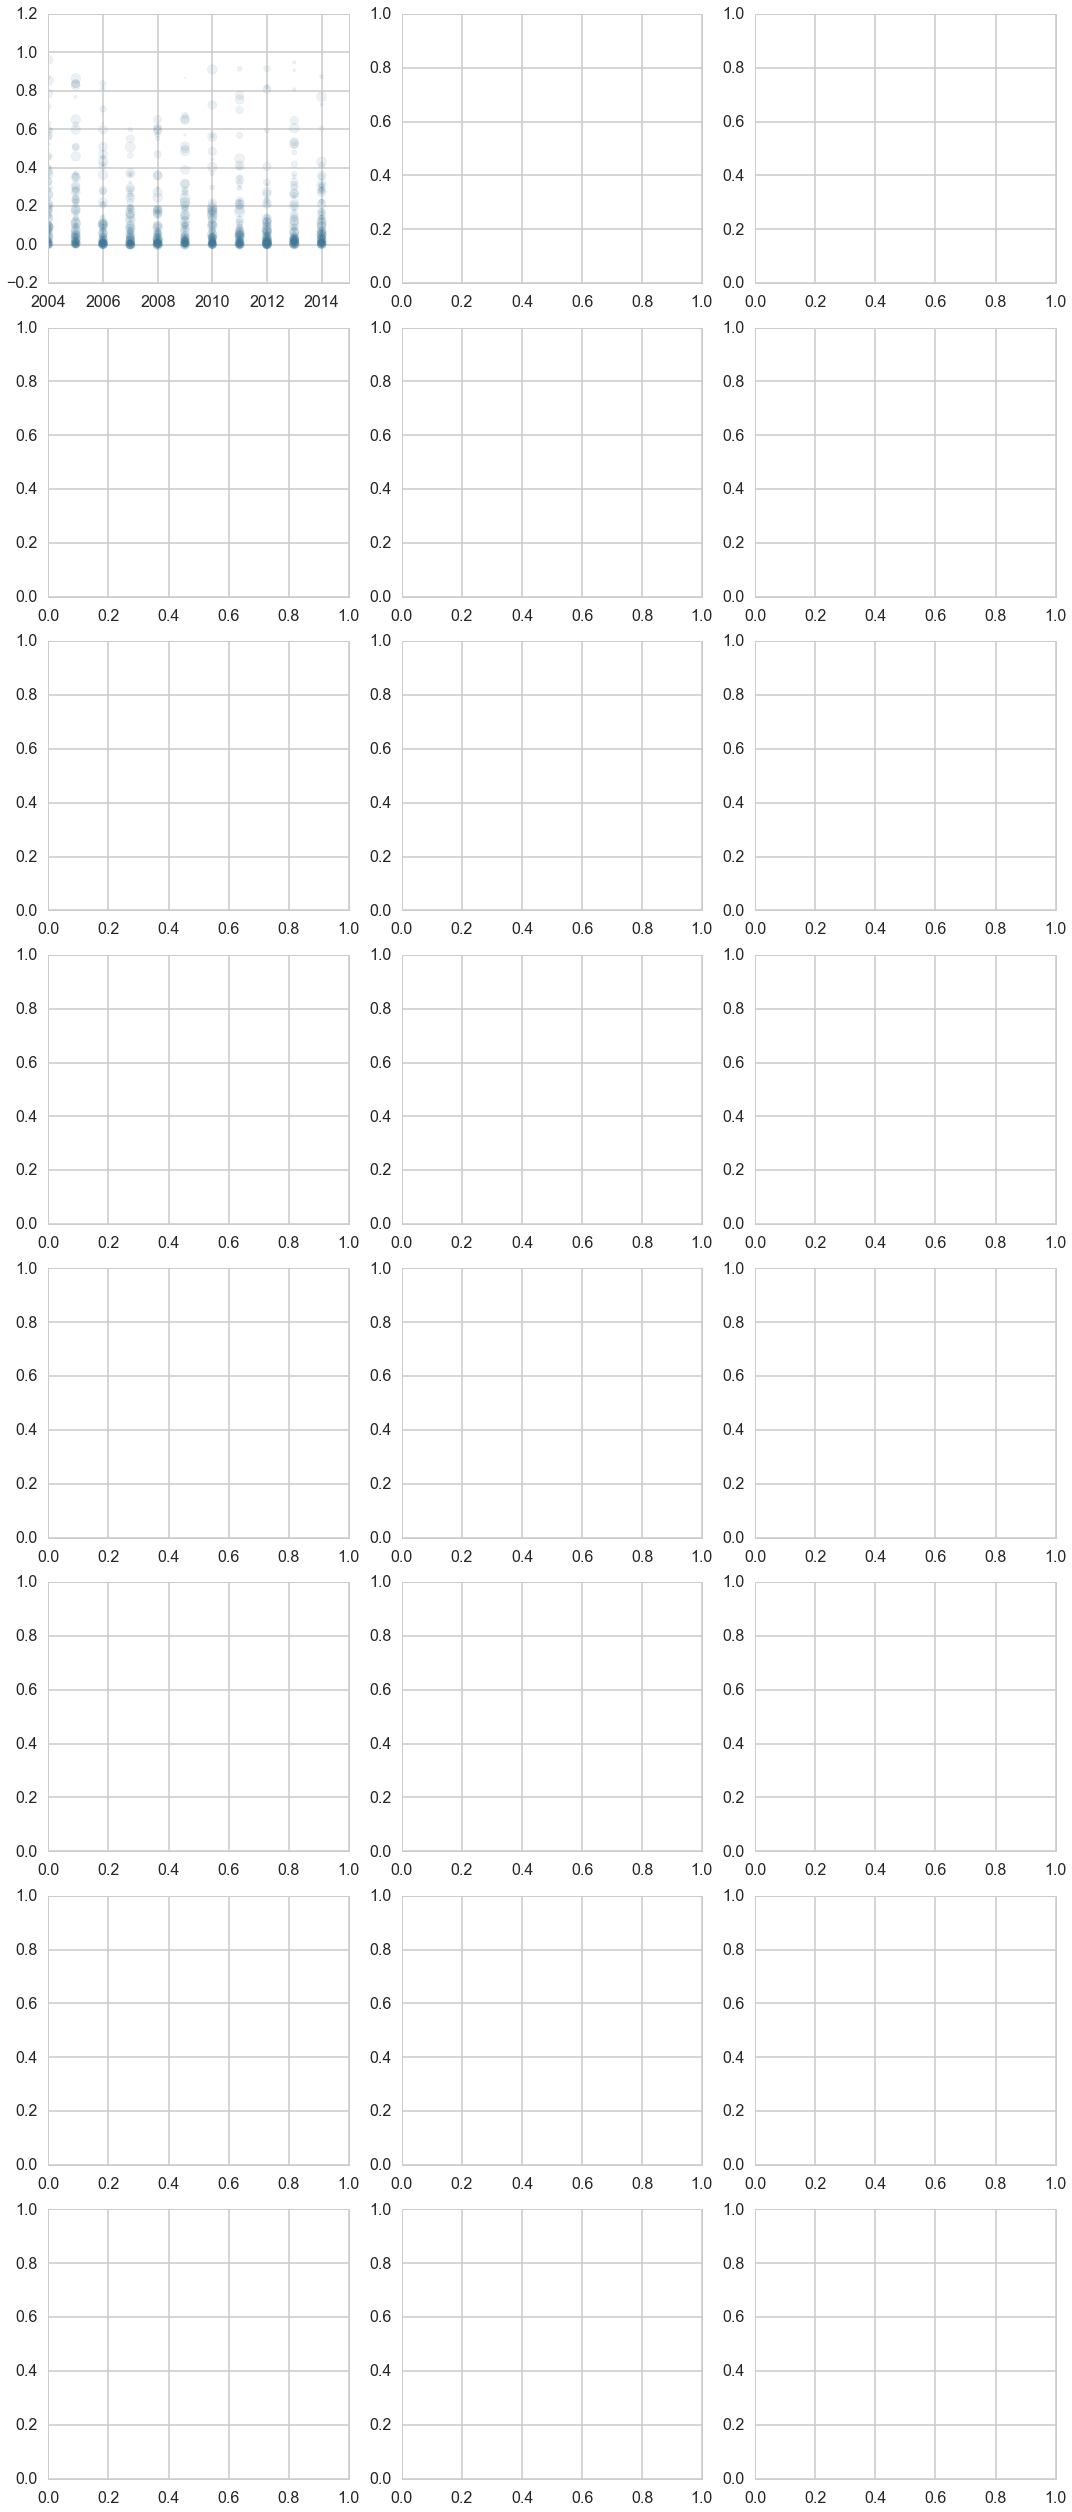

In [74]:
# HW1
# my code

# create a 8x3 grid of plots.
fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(15, 35), tight_layout = True)
fig.subplots_adjust(hspace=3, wspace = 2)

for ax, var in zip(axes.ravel(), variables):
    ax.set_xlim([2004,2015])
    # ax.set_ylim([0,100])
    
    # plotting the scatter plot
#     year2 = np.repeat(year, len(all_05_14), axis=0)
#     ax.plot(all_05_14["year"], all_05_14[var], marker='o', linestyle='', color = "#407899", alpha=.1, lw = 1)
    ax.scatter(updated_data["year"], updated_data[var],marker='o', color = "#407899", alpha=.1, s = updated_data["ranking"])

#     for year, group in genreinfo[genre]['rankingseries']:
#         year2 = np.repeat(year, len(group), axis=0)
#         ax.plot(year2, group, marker='o', linestyle='', color = "#407899", alpha=.1, lw = 1)

    # plotting the averages
    ax.plot(updated_data["year"].unique(), updated_data.groupby("year")[var].mean(), 
            'o-', color='#791E94', lw=1, label='Decade Average')
#     for year in all_05_14.year.unique():
#         sub = all_05_14[all_05_14.year == year]
#         ax.plot(year, sub[var].mean(), 'o-',
#                 color='#791E94', lw=1, label='Decade Average')

    # plotting the bands
#     lower = np.array([])
#     higher = np.array([])
#     for mean, std in zip(genreinfo[genre]["meanseries"].values, genreinfo[genre]["stdseries"].values):

#         if math.isnan(std) == True:
#             lower = np.append(lower, 0) 
#             higher = np.append(higher, 100)
#         else:
#             lower = np.append(lower, mean - std) 
#             higher = np.append(higher, mean + std)

#     ax.fill_between(genreinfo[genre]['meanseries'].index, higher, lower,
#                     color='#ECAFFF', alpha=.3)

#     ax.annotate((genre[6:]).replace("_", " "), xy=(1990, 100), fontsize=18)
    ax.set_title(var)

    ax.set_xlabel("Year")
#     ax.set_ylabel('Rank')

Because change is not noticeable in these past ten years, it appears that we do not have to take time into account.

## The baseline model
To motivate our recommendation system, consider the following example. Let's pretend we are in Boston for a second. Lets say the average rating of restaurants here by all the users is 3.5. Sandrine's at Harvard square is better than an average restaurant, so it tends to be rated 0.5 stars above the average of all restaurants. However, you are a curmudgeon, who tends to rate 0.2 stars below the average. Then a baseline estimate for the recommendation for Sandrine's, for you, is 3.5+0.5-0.2=3.8.

These baseline estimates thus adjust the data by accounting for the systematic tendencies for some users who give higher ratings than others, and for some restaurants to receive higher ratings than others. We can write the baseline estimate $\hat Y_{um}^{baseline}$ for an unknown rating $Y_{um}$ for user $u$ and restaurant or business $m$ as:

$$ \hat Y_{um}^{baseline} = \hat \mu + \hat \theta_{u} + \hat \gamma_{m} $$

where the unknown parameters $\theta_{u}$ and $\gamma_{m}$ indicate the deviations, or biases, of user $u$ and item $m$, respectively, from some intercept parameter $\mu$. 

Notice that the $\theta_{u}$ and $\gamma_{m}$ are parameters which need to be fit. The simplest thing to start with is to replace them by their "mean" estimates from the data. Thus:

$$ \hat Y^{baseline}_{um} = \bar Y + (\bar Y_u - \bar Y) + (\bar Y_m - \bar Y)$$

where $\bar Y_u$ =  `user_avg`, the average of all a user $u$'s ratings and $\bar Y_m$ = `business_avg`, the average of all ratings for a restaurant $m$. $\bar Y$ is the average rating over all reviews.

The final two terms correspond to the user-specific and item-specific bias in ratings, that is, how their ratings tend to systematically diverge from the global average. This is the simplest possible way to predict a rating, based only on information about *this* user and *this* restaurant.

In [159]:
df=updated_data.copy()

In [160]:
df.columns.values

array(['Unnamed: 0', 'acousticness', 'analysis_url', 'artist_discovery',
       'artist_discovery_rank', 'artist_familiarity',
       'artist_familiarity_rank', 'artist_hotttnesss',
       'artist_hotttnesss_rank', 'artist_id', 'artist_location',
       'artist_name', 'audio_md5', 'audio_summary', 'danceability',
       'duration', 'energy', 'id', 'index', 'key', 'liveness', 'loudness',
       'mode', 'song_currency', 'song_currency_rank', 'song_discovery',
       'song_discovery_rank', 'song_hotttnesss', 'song_hotttnesss_rank',
       'song_type', 'speechiness', 'tempo', 'time_signature', 'title',
       'valence', 'date', 'first_ranking', 'lower_title', 'lower_artist',
       'year', 'band_singer', 'ranking', 'song', 'songurl', 'url',
       'billboard_year', 'billboard_week', 'latitude', 'longitude',
       'location', 'location_lower'], dtype=object)

In [77]:
"""import ast
latitude = []
longitude = []
location = []

df['artist_location'][1304] = "%s" % {u'latitude': 43.2937, u'location': u'Marseille, Provence-Alpes-Cote dAzur, FR', u'longitude': 5.37247}
df['artist_location'][2087] = "%s" % {u'latitude': 57.5948, u'location': u'Un, Sverdlovsk Oblast, RU', u'longitude': 58.6811}

for index, row in df.iterrows():
    print index
    locate = ast.literal_eval(row['artist_location'])
    la = np.nan
    lo = np.nan
    loca = np.nan
    if locate:
        if locate["latitude"]:
            la = locate["latitude"]
        if locate["longitude"]:
            lo = locate["longitude"]
        if locate["location"]:
            loca = locate["location"]
            
    latitude.append(la)
    longitude.append(lo)
    location.append(loca)

df["latitude"] = latitude 
df["longitude"] = longitude
df["location"] = location"""
        

/Users/StevenLee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/StevenLee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [161]:
df.head()

,Unnamed: 0,acousticness,analysis_url,artist_discovery,artist_discovery_rank,artist_familiarity,artist_familiarity_rank,artist_hotttnesss,artist_hotttnesss_rank,artist_id,artist_location,artist_name,audio_md5,audio_summary,danceability,duration,energy,id,index,key,liveness,loudness,mode,song_currency,song_currency_rank,song_discovery,song_discovery_rank,song_hotttnesss,song_hotttnesss_rank,song_type,speechiness,tempo,time_signature,title,valence,date,first_ranking,lower_title,lower_artist,year,band_singer,ranking,song,songurl,url,billboard_year,billboard_week,latitude,longitude,location,location_lower
0,0,0.023664,http://echonest-analysis.s3.amazonaws.com/TR/P...,0.369704,NaN,0.673539,NaN,0.588086,NaN,ARN7POH1187B9B301E,"{u'latitude': 32.576489, u'location': u'Abilen...",Jessica Simpson,510d03f7f7773ffe84bd6365e75dfc45,"{u'key': 4, u'analysis_url': u'http://echonest...",0.644058,232.59955,0.872039,SOZYMAL14B5D7A5698,2,4,0.033556,-9.151,0,0.006367,NaN,0.000000,NaN,0.355779,NaN,"[studio, electric, vocal]",0.044870,130.180,4,I Wanna Love You Forever,0.626382,2000-01-01,3,i wanna love you forever,jessica simpson,2000,Jessica Simpson,56,I Wanna Love You Forever,/wiki/I_Wanna_Love_You_Forever,/wiki/Jessica_Simpson,2000,5,32.576489,-99.665323,"Abilene, TX","abilene, tx"
1,1,0.046606,http://echonest-analysis.s3.amazonaws.com/TR/7...,0.299033,437039,0.811461,83,0.654229,1358,AR30R5E1187B9AD78A,"{u'latitude': 40.736101, u'location': u'Newark...",Whitney Houston,24aa3d1259e3480900721571bc4fe8d6,"{u'key': 0, u'analysis_url': u'http://echonest...",0.660295,258.09288,0.847010,SOPBEQQ12B0B80B9BD,3,0,0.066933,-6.398,1,0.028660,24931,0.002068,1561470,0.461754,9856,"[studio, electric, vocal]",0.037339,134.980,4,My Love Is Your Love,0.510183,2000-01-01,4,my love is your love,whitney houston,2000,Whitney Houston,47,My Love Is Your Love,/wiki/My_Love_Is_Your_Love_(song),/wiki/Whitney_Houston,2000,5,40.736101,-74.225090,"Newark, NJ","newark, nj"
2,2,0.240021,http://echonest-analysis.s3.amazonaws.com/TR/r...,0.453046,30544,0.561868,5061,0.596687,2763,AR6JVK31187FB58FE3,"{u'latitude': 45.05, u'location': u'Turin, Ita...",Eiffel 65,NaN,"{u'key': 7, u'analysis_url': u'http://echonest...",0.812507,210.18667,0.971241,SOOAIRU146168415C1,12,7,0.386530,-6.810,0,0.055708,11236,0.006311,567371,0.471915,8139,"[studio, electric, vocal]",0.052639,127.982,4,Blue (Da Ba Dee),0.795222,2000-01-01,13,blue (da ba dee),eiffel 65,2000,Eiffel 65,49,Blue (Da Ba Dee),/wiki/Blue_(Da_Ba_Dee),/wiki/Eiffel_65,2000,5,45.050000,7.666667,"Turin, Italy","turin, italy"
3,3,0.161116,http://echonest-analysis.s3.amazonaws.com/TR/O...,0.416272,NaN,0.542365,NaN,0.532190,NaN,ARM8DAD1187B993E2E,"{u'latitude': 26.0657, u'location': u'Davie, F...",Guy,a533657e04f50cb451677695ce32c756,"{u'key': 1, u'analysis_url': u'http://echonest...",0.833038,281.56757,0.337699,SOQSRPK13E90787CD5,18,1,0.185389,-16.155,1,0.000000,NaN,0.000000,NaN,0.000000,NaN,"[studio, electric, vocal]",0.151720,101.108,4,Dancin',0.705580,2000-01-01,19,dancin',guy,NaN,NaN,NaN,NaN,NaN,NaN,2000,5,26.065700,-80.234900,"Davie, FL, US","davie, fl, us"
4,4,0.562595,http://echonest-analysis.s3.amazonaws.com/TR/j...,0.487270,5662,0.417185,31892,0.521144,11716,AR8VNGZ1187FB4168D,"{u'latitude': 43.6486, u'location': u'Toronto,...",LEN,6ab709aba3e5f7f1b7bf1892307d7c89,"{u'key': 4, u'analysis_url': u'http://echonest...",0.580348,203.04934,0.680611,SOAEYTC144D7F51291,19,4,0.579321,-19.717,1,0.045766,15729,0.000000,NaN,0.508462,4178,"[studio, vocal]",0.068707,96.171,4,Steal My Sunshine,0.729627,2000-01-01,20,steal my sunshine,len,NaN,NaN,NaN,NaN,NaN,NaN,2000,5,43.648600,-79.385300,"Toronto, Ontario, CA","toronto, ontario, ca"


In [162]:
df = df.drop(['Unnamed: 0','analysis_url', 'artist_discovery_rank', 
              'artist_familiarity_rank', 'artist_hotttnesss_rank', 
              'artist_id', 'artist_location', 'audio_md5', 'audio_summary', 
              'id', 'song_currency_rank', 'song_discovery_rank', 
              'song_hotttnesss_rank', 'song_type', 'lower_title', 
              'lower_artist', 'band_singer', 'song', 'songurl', 'url', 
              'location', 'location_lower'], 1)

In [163]:
df.isnull().sum()

acousticness             0
artist_discovery        11
artist_familiarity       0
artist_hotttnesss        0
artist_name              0
danceability             0
duration                 0
energy                   0
index                    0
key                      0
liveness                 0
loudness                 0
mode                     0
song_currency            0
song_discovery           0
song_hotttnesss          0
speechiness              7
tempo                    0
time_signature           0
title                    0
valence                  0
date                     0
first_ranking            0
year                  4173
ranking               4173
billboard_year           0
billboard_week           0
latitude                68
longitude               68
dtype: int64

In [164]:
PROP_VARS=[ u'acousticness', u'artist_familiarity', u'artist_hotttnesss', u'danceability', u'energy', u'liveness', 
           u'song_currency', u'song_discovery', u'song_hotttnesss', u'valence']
PROP_MISSING = [u'artist_discovery', u'speechiness']
len(PROP_VARS)

10

In [165]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(df[PROP_MISSING])


Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [166]:
df[PROP_MISSING] = imp.transform(df[PROP_MISSING])

In [167]:
df[PROP_MISSING].isnull().sum()

artist_discovery    0
speechiness         0
dtype: int64

In [168]:
print list(df.columns.values)

['acousticness', 'artist_discovery', 'artist_familiarity', 'artist_hotttnesss', 'artist_name', 'danceability', 'duration', 'energy', 'index', 'key', 'liveness', 'loudness', 'mode', 'song_currency', 'song_discovery', 'song_hotttnesss', 'speechiness', 'tempo', 'time_signature', 'title', 'valence', 'date', 'first_ranking', 'year', 'ranking', 'billboard_year', 'billboard_week', 'latitude', 'longitude']


In [178]:
CONTINUOUS = [u'duration', u'loudness', u'tempo', 'billboard_week']
CATEGORICAL = [u'key', u'time_signature']
CAT_S = [ u'song_type']
INDICATOR = [u'mode']

In [179]:
STANDARDIZABLE = PROP_VARS + PROP_MISSING + CONTINUOUS

In [180]:
## From HW3
from sklearn.cross_validation import train_test_split
itrain, itest = train_test_split(xrange(df.shape[0]), train_size=0.7)

In [181]:
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [182]:
mask.shape, mask.sum()

((5363,), 3754)

In [183]:
train = df[mask]
opp_mask = [not i for i in mask]
test = df[opp_mask]

#### Standardize values???

In [184]:
df.isnull().sum()

acousticness             0
artist_discovery         0
artist_familiarity       0
artist_hotttnesss        0
artist_name              0
danceability             0
duration                 0
energy                   0
index                    0
key                      0
liveness                 0
loudness                 0
mode                     0
song_currency            0
song_discovery           0
song_hotttnesss          0
speechiness              0
tempo                    0
time_signature           0
title                    0
valence                  0
date                     0
first_ranking            0
year                  4173
ranking               4173
billboard_year           0
billboard_week           0
latitude                68
longitude               68
RESP                     0
dtype: int64

In [185]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(train[STANDARDIZABLE])
train = scaler.transform(train[STANDARDIZABLE])  
test = scaler.transform(test[STANDARDIZABLE]) 

In [186]:
df["RESP"]=1*(df.ranking <= 100)

In [187]:
## number of features
lcols=list(df.columns)
lcols.remove(u'ranking')
lcols.remove(u'RESP')
lcols.remove(u'artist_name')
lcols.remove(u'title')
lcols.remove(u'date')
lcols.remove(u'latitude')
lcols.remove(u'longitude')
lcols.remove(u'year')
lcols.remove(u'song_currency')
lcols.remove(u'billboard_year')
print len(lcols)

20


(5363, 30)
(1190, 30)
(4173, 30)


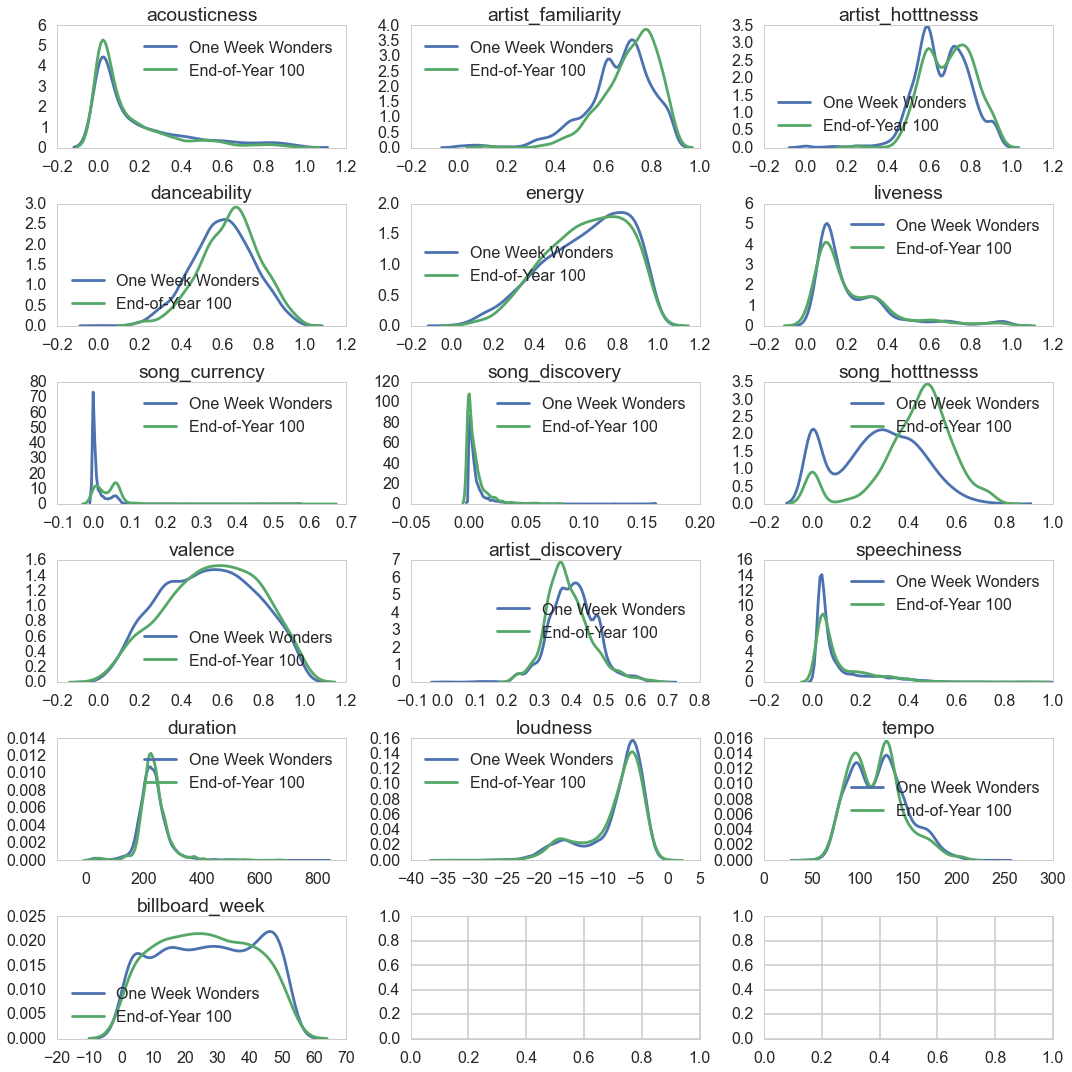

In [188]:
# my code
top_df = df[np.isfinite(df['ranking'])]
bottom_df = df[~np.isfinite(df['ranking'])]
print df.shape
print top_df.shape
print bottom_df.shape

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 15), tight_layout = True)
fig.subplots_adjust(hspace=3, wspace = 2)

for ax, feat in zip(axes.ravel(), STANDARDIZABLE):
    sns.kdeplot(bottom_df[feat], ax=ax, label = "One Week Wonders")
    sns.kdeplot(top_df[feat], ax=ax, label = "End-of-Year 100")
    ax.set_title(feat)
    ax.grid(False)

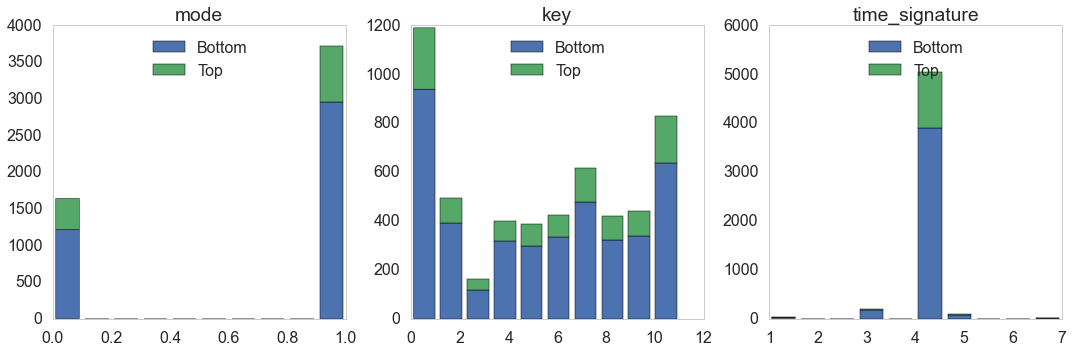

In [189]:
# my code
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), tight_layout = True)
fig.subplots_adjust(hspace=3, wspace = 2)

for ax, feat in zip(axes.ravel(), INDICATOR+CATEGORICAL):
    ax.hist([bottom_df[feat],top_df[feat]], stacked=True, label= ["Bottom","Top"])
    ax.set_title(feat)
    ax.legend(loc = 'upper center')
    ax.grid(False)

In [190]:
#1.4 from HW3
from sklearn.svm import LinearSVC

In [191]:
clfsvm=LinearSVC(loss="hinge")
Cs=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
Xmatrix=df[lcols].values
Yresp=df['RESP'].values

In [192]:
Yresp.shape

(5363,)

In [193]:
Xmatrix_train=Xmatrix[mask]
Xmatrix_test=Xmatrix[~mask]
Yresp_train=Yresp[mask]
Yresp_test=Yresp[~mask]

In [194]:
Xmatrix[0]

array([  2.36640000e-02,   3.69704266e-01,   6.73539000e-01,
         5.88086000e-01,   6.44058000e-01,   2.32599550e+02,
         8.72039000e-01,   2.00000000e+00,   4.00000000e+00,
         3.35560000e-02,  -9.15100000e+00,   0.00000000e+00,
         0.00000000e+00,   3.55779000e-01,   4.48700000e-02,
         1.30180000e+02,   4.00000000e+00,   6.26382000e-01,
         3.00000000e+00,   5.00000000e+00])

In [195]:
# get the best fit classifier
from sklearn.grid_search import GridSearchCV
# gs=GridSearchCV(clfsvm, param_grid={'C':Cs}, cv=5)
# gs.fit(Xmatrix_train, Yresp_train)
# print "BEST", gs.best_params_, gs.best_score_, gs.grid_scores_

def cv_optimize_simple(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print "BEST PARAMS", gs.best_params_
    best = gs.best_estimator_
    return best

best = cv_optimize_simple(clfsvm, {"C":Cs}, Xmatrix, Yresp)

BEST PARAMS {'C': 100.0}


In [196]:
# calculate the accuracy here
# my code


def do_classify_simple(clf):
    clf=clf.fit(Xmatrix_train, Yresp_train)
    training_accuracy = clf.score(Xmatrix_train, Yresp_train)
    test_accuracy = clf.score(Xmatrix_test, Yresp_test)
    print "Accuracy on training data: %0.5f" % (training_accuracy)
    print "Accuracy on test data:     %0.5f" % (test_accuracy)

do_classify_simple(best)

Accuracy on training data: 0.77757
Accuracy on test data:     0.79553


In [197]:
"""
Function
--------
cv_optimize

Inputs
------
clf : an instance of a scikit-learn classifier
parameters: a parameter grid dictionary thats passed to GridSearchCV (see above)
X: a samples-features matrix in the scikit-learn style
y: the response vectors of 1s and 0s (+ives and -ives)
n_folds: the number of cross-validation folds (default 5)
score_func: a score function we might want to pass (default python None)
   
Returns
-------
The best estimator from the GridSearchCV, after the GridSearchCV has been used to
fit the model.
     
Notes
-----
see do_classify and the code below for an example of how this is used
"""
# my code

def cv_optimize(clf, parameters, X, y, n_folds = 5, score_func = None):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring = score_func)
    gs.fit(X, y)
    print "BEST PARAMS", gs.best_params_
    best = gs.best_estimator_
    return best

In [198]:
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "############# based on standard predict ################"
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    print confusion_matrix(ytest, clf.predict(Xtest))
    print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [199]:
%%time
clfsvm, Xtrain, ytrain, Xtest, ytest = do_classify(LinearSVC(loss="hinge"), {"C": [0.00001, 0.01, 0.1, 1.0, 10.0, 100.0]}, df,lcols, u'RESP',1, mask=mask)

using mask
BEST PARAMS {'C': 1e-05}
############# based on standard predict ################
Accuracy on training data: 0.77
Accuracy on test data:     0.79
[[1279    0]
 [ 330    0]]
########################################################
CPU times: user 8.48 s, sys: 50.8 ms, total: 8.53 s
Wall time: 8.57 s


/Users/StevenLee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


#### Naive Bayes Classifier

In [201]:
from sklearn.naive_bayes import GaussianNB
clfgnb = GaussianNB()
clfgnb, Xtrain, ytrain, Xtest, ytest=do_classify(clfgnb, None, df, lcols, u'RESP', 1, mask=mask)

using mask
############# based on standard predict ################
Accuracy on training data: 0.77
Accuracy on test data:     0.75
[[1071  208]
 [ 197  133]]
########################################################


/Users/StevenLee/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


In [202]:
Xtest.shape

(1609, 20)

In [203]:
reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

In [204]:
# See whether data set is asymmetric
print "whole data set", df['RESP'].mean()#Highly asymmetric
print "training set", df['RESP'][mask].mean(), "test set", df['RESP'][~mask].mean()

whole data set 0.221890732799
training set 0.229088971763 test set 0.205096333126


In [205]:
from sklearn.linear_model import LogisticRegression

In [206]:
%%time
clflog, _,_,_,_ = do_classify(LogisticRegression(penalty="l1"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, df,lcols, u'RESP',1, reuse_split = reuse_split)

using reuse split
BEST PARAMS {'C': 1.0}
############# based on standard predict ################
Accuracy on training data: 0.81
Accuracy on test data:     0.81
[[1191   88]
 [ 223  107]]
########################################################
CPU times: user 1.65 s, sys: 22 ms, total: 1.67 s
Wall time: 1.68 s


In [207]:
print lcols

['acousticness', 'artist_discovery', 'artist_familiarity', 'artist_hotttnesss', 'danceability', 'duration', 'energy', 'index', 'key', 'liveness', 'loudness', 'mode', 'song_discovery', 'song_hotttnesss', 'speechiness', 'tempo', 'time_signature', 'valence', 'first_ranking', 'billboard_week']


In [208]:
df['Prob of Failure'] = clflog.predict_proba(Xmatrix)[:,0].tolist()
df['year'] = updated_data['year']
df.head()

,acousticness,artist_discovery,artist_familiarity,artist_hotttnesss,artist_name,danceability,duration,energy,index,key,liveness,loudness,mode,song_currency,song_discovery,song_hotttnesss,speechiness,tempo,time_signature,title,valence,date,first_ranking,year,ranking,billboard_year,billboard_week,latitude,longitude,RESP,Prob of Failure
0,0.023664,0.369704,0.673539,0.588086,Jessica Simpson,0.644058,232.59955,0.872039,2,4,0.033556,-9.151,0,0.006367,0.000000,0.355779,0.044870,130.180,4,I Wanna Love You Forever,0.626382,2000-01-01,3,2000,56,2000,5,32.576489,-99.665323,1,0.378994
1,0.046606,0.299033,0.811461,0.654229,Whitney Houston,0.660295,258.09288,0.847010,3,0,0.066933,-6.398,1,0.028660,0.002068,0.461754,0.037339,134.980,4,My Love Is Your Love,0.510183,2000-01-01,4,2000,47,2000,5,40.736101,-74.225090,1,0.241826
2,0.240021,0.453046,0.561868,0.596687,Eiffel 65,0.812507,210.18667,0.971241,12,7,0.386530,-6.810,0,0.055708,0.006311,0.471915,0.052639,127.982,4,Blue (Da Ba Dee),0.795222,2000-01-01,13,2000,49,2000,5,45.050000,7.666667,1,0.224371
3,0.161116,0.416272,0.542365,0.532190,Guy,0.833038,281.56757,0.337699,18,1,0.185389,-16.155,1,0.000000,0.000000,0.000000,0.151720,101.108,4,Dancin',0.705580,2000-01-01,19,NaN,NaN,2000,5,26.065700,-80.234900,0,0.775138
4,0.562595,0.487270,0.417185,0.521144,LEN,0.580348,203.04934,0.680611,19,4,0.579321,-19.717,1,0.045766,0.000000,0.508462,0.068707,96.171,4,Steal My Sunshine,0.729627,2000-01-01,20,NaN,NaN,2000,5,43.648600,-79.385300,0,0.373583


In [209]:
print lcols

['acousticness', 'artist_discovery', 'artist_familiarity', 'artist_hotttnesss', 'danceability', 'duration', 'energy', 'index', 'key', 'liveness', 'loudness', 'mode', 'song_discovery', 'song_hotttnesss', 'speechiness', 'tempo', 'time_signature', 'valence', 'first_ranking', 'billboard_week']


In [210]:
sorted_df = df.sort(['year', 'Prob of Failure'], ascending=[True, True])
sorted_df.shape

(5363, 31)

In [211]:
sorted_df[np.isnan(sorted_df['year'])].shape

(4173, 31)

In [212]:
# Like HW3 3.1
from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:#for stuff like logistic regression
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:#for stuff like SVM
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
    )
    if labe!=None:
        for k in xrange(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

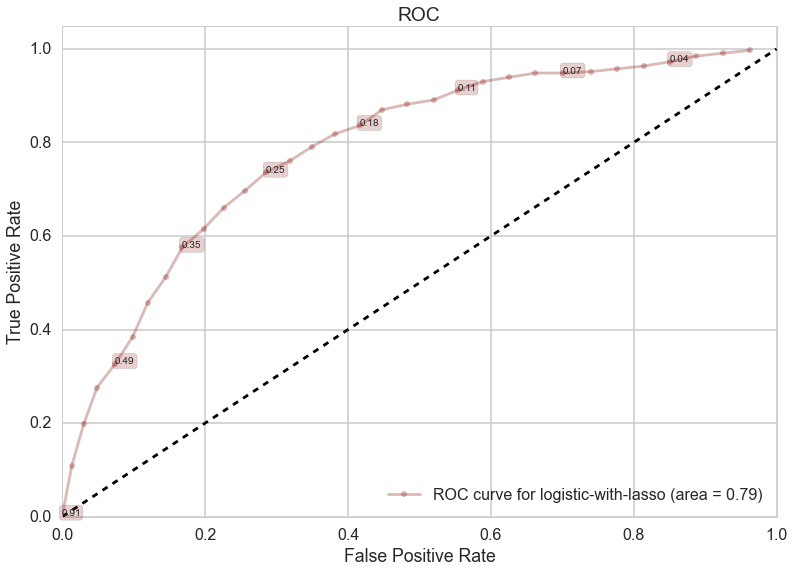

In [213]:
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("logistic-with-lasso",clflog, ytest, Xtest, labe=200, skip=50)

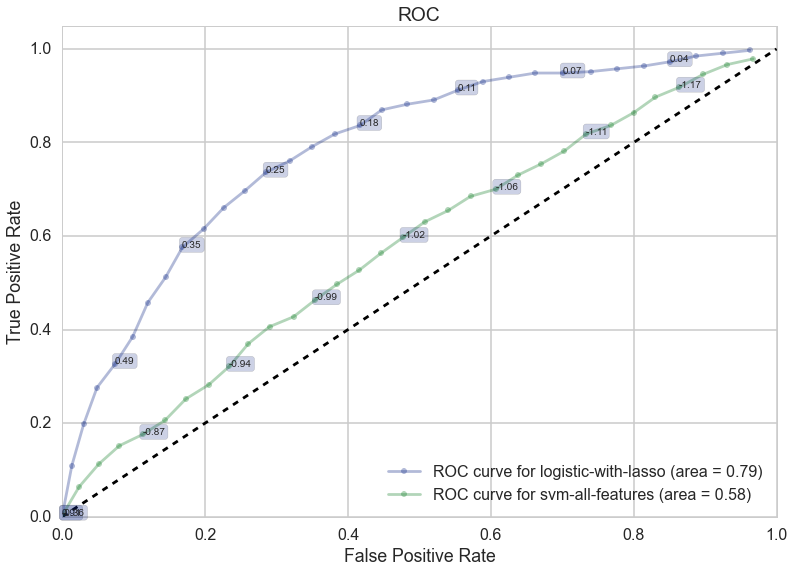

In [214]:
with sns.color_palette("dark"):
    ax=make_roc("logistic-with-lasso",clflog, ytest, Xtest, labe=200, skip=50)
    make_roc("svm-all-features",clfsvm, ytest, Xtest, ax, labe=200, proba=False, skip=50);

### PCA SECTION

In [215]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
Xpca = pca.fit_transform(Xmatrix)
print
print pca.explained_variance_ratio_.sum()


0.998804667157


In [216]:
pca.explained_variance_ratio_*100

array([ 99.34859798,   0.40940238,   0.12246636])

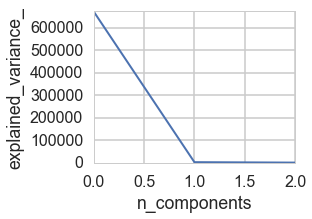

In [217]:
pca.fit(Xmatrix)
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [218]:
pca_df = pd.DataFrame({"y":Yresp, "label":np.where(Yresp==1, "top", "bottom")})
for i in range(pca.explained_variance_ratio_.shape[0]):
    pca_df["pc%i" % (i+1)] = Xpca[:,i]
pca_df.head()

,label,y,pc1,pc2,pc3
0,top,1,1454.875880,-4.526460,14.703782
1,top,1,1453.961622,20.911657,19.726765
2,top,1,1444.768390,-26.951437,12.077529
3,bottom,0,1439.043581,44.660465,-14.768534
4,bottom,0,1437.757319,-33.794064,-20.363126


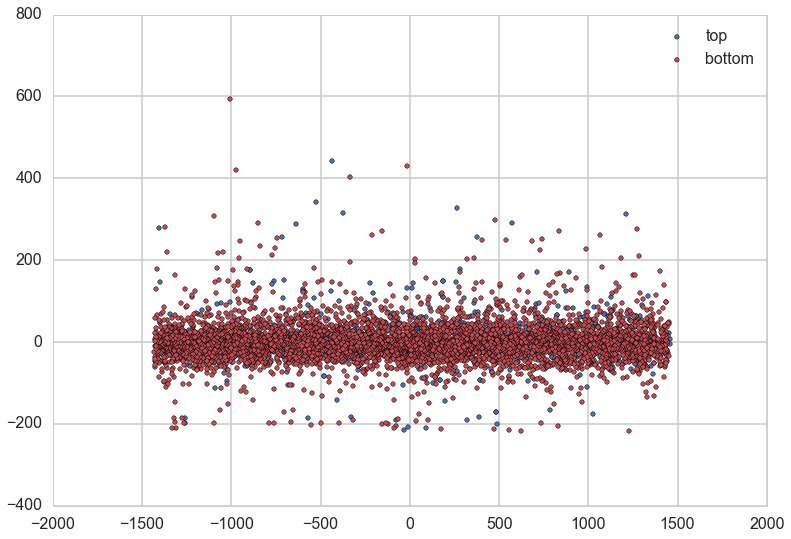

In [219]:
c0=sns.color_palette()[0]
c1=sns.color_palette()[1]
c2=sns.color_palette()[2]
colors = [c0, c2]
for label, color in zip(pca_df['label'].unique(), colors):
    m = pca_df['label']==label
    plt.scatter(pca_df[m]['pc1'], pca_df[m]['pc2'], c=color, label=label)
plt.legend()

In [220]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

In [221]:
def points_plot_prob(ax, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold, ccolor=cm, psize=10, alpha=0.1):
    ax,xx,yy = points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=False, colorscale=colorscale, cdiscrete=cdiscrete, psize=psize, alpha=alpha, predicted=True) 
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=ccolor, alpha=.2, axes=ax)
    cs2 = plt.contour(xx, yy, Z, cmap=ccolor, alpha=.6, axes=ax)
    plt.clabel(cs2, fmt = '%2.1f', colors = 'k', fontsize=14, axes=ax)
    return ax 

In [222]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
ys=pca_df['y'].astype(int).values
subdf=pca_df[['pc1','pc2']]
subdfstd=(subdf - subdf.mean())/subdf.std()
Xs=subdfstd.values
def classify(X,y, nbrs, plotit=True, train_size=0.6):
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf= KNeighborsClassifier(nbrs)
    clf=clf.fit(Xtrain, ytrain)
    #in sklearn accuracy can be found by using "score". It predicts and then gets the accuracy
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    Xall=np.concatenate((Xtrain, Xtest))
    if plotit:
        print "Accuracy on training data: %0.2f" % (training_accuracy)
        print "Accuracy on test data:     %0.2f" % (test_accuracy)
        plt.figure()
        ax=plt.gca()
        points_plot(ax, Xtrain, Xtest, ytrain, ytest, clf, alpha=0.3, psize=20)
    return nbrs, training_accuracy, test_accuracy

Accuracy on training data: 0.79
Accuracy on test data:     0.76


(10, 0.79452906434566362, 0.75535880708294501)

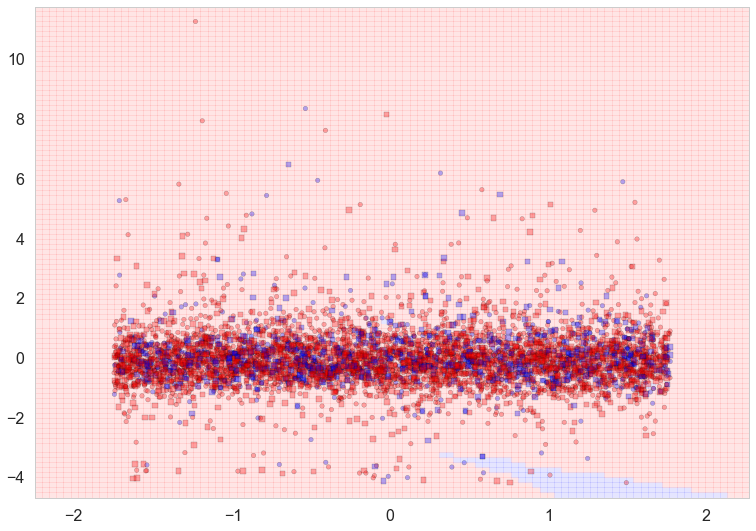

In [223]:
classify(Xs, ys, 10)

In [224]:
from sklearn.cross_validation import train_test_split
def do_classify_pca(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print "Accuracy on training data: %0.2f" % (training_accuracy)
    print "Accuracy on test data:     %0.2f" % (test_accuracy)
    return clf, Xtrain, ytrain, Xtest, ytest

In [225]:
bestcv, Xtr, ytr, Xtt, ytt = do_classify_pca(KNeighborsClassifier(), {"n_neighbors": range(1,40,2)}, pca_df, ['pc1','pc2'], 'label', 'top' )

BEST PARAMS {'n_neighbors': 35}
Accuracy on training data: 0.78
Accuracy on test data:     0.78


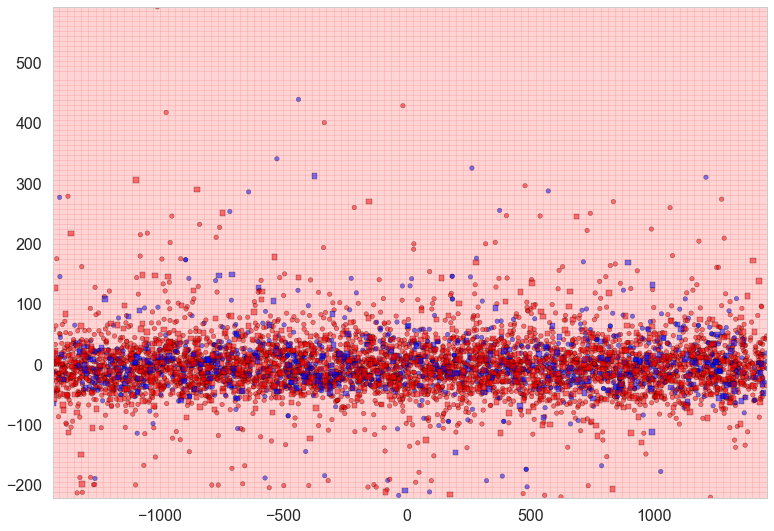

In [226]:

plt.figure()
ax=plt.gca()
points_plot(ax, Xtr, Xtt, ytr, ytt, bestcv, alpha=0.5, psize=20);

In [227]:
%%time
# my code
pcaclflog, Xtr, ytr, Xtt, ytt = do_classify(LogisticRegression(penalty="l1"), {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, pca_df,['pc1'], 'label','top', reuse_split = reuse_split)

using reuse split
BEST PARAMS {'C': 1.0}
############# based on standard predict ################
Accuracy on training data: 0.81
Accuracy on test data:     0.81
[[1189   90]
 [ 223  107]]
########################################################
CPU times: user 1.58 s, sys: 21.8 ms, total: 1.6 s
Wall time: 1.61 s


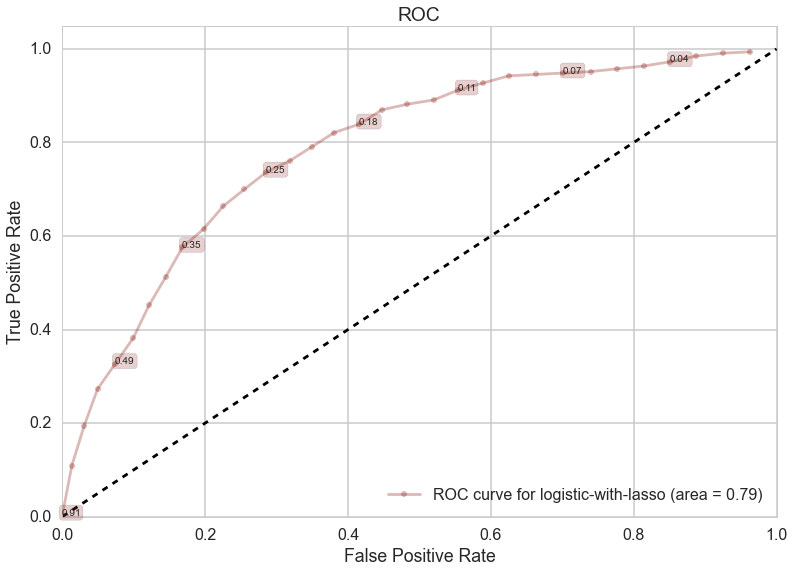

In [228]:
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("logistic-with-lasso",pcaclflog, ytest, Xtest, labe=200, skip=50)

In [229]:
# Feature Selection--Part 4 on HW 3

def nonzero_lasso(clf):
    featuremask=(clf.coef_ !=0.0)[0]
    print featuremask
    print lcols
    return pd.DataFrame(dict(feature=lcols, coef=clf.coef_[0], abscoef=np.abs(clf.coef_[0])))[featuremask].sort('abscoef', ascending=False)

In [230]:
lasso_importances=nonzero_lasso(clflog)
lasso_importances.set_index("feature", inplace=True)
lasso_importances

[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True]
['acousticness', 'artist_discovery', 'artist_familiarity', 'artist_hotttnesss', 'danceability', 'duration', 'energy', 'index', 'key', 'liveness', 'loudness', 'mode', 'song_discovery', 'song_hotttnesss', 'speechiness', 'tempo', 'time_signature', 'valence', 'first_ranking', 'billboard_week']


,abscoef,coef
feature,,
song_hotttnesss,6.292677,6.292677
danceability,1.912086,1.912086
artist_discovery,1.655376,-1.655376
energy,1.520222,-1.520222
speechiness,0.838731,0.838731
acousticness,0.712289,-0.712289
valence,0.518616,0.518616
liveness,0.291127,0.291127
mode,0.159871,-0.159871


In [231]:
# make copy of dataframe to make transformations to
dftouse = df.copy()

In [232]:
# Feature Importance using correlations
from scipy.stats.stats import pearsonr
correlations=[]
dftousetrain=dftouse[mask]
for col in lcols:
    r=pearsonr(dftousetrain[col], dftousetrain['RESP'])[0]
    correlations.append(dict(feature=col,corr=r, abscorr=np.abs(r)))

bpdf=pd.DataFrame(correlations).sort('abscorr', ascending=False)
bpdf.set_index(['feature'], inplace=True)
bpdf.head(25)

,abscorr,corr
feature,,
song_hotttnesss,0.367153,0.367153
first_ranking,0.199590,-0.199590
artist_familiarity,0.168370,0.168370
artist_hotttnesss,0.132691,0.132691
danceability,0.115565,0.115565
song_discovery,0.115228,0.115228
artist_discovery,0.087671,-0.087671
acousticness,0.081434,-0.081434
mode,0.068041,-0.068041


In [233]:
# Create pipeline to feature-select, standardize, and train. Maybe will help improve performance
# Does not reduce collinearity, will need to do dimensionality reduction as the next step
from sklearn import feature_selection
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest

In [234]:

def pearson_scorer(X,y):
    rs=np.zeros(X.shape[1])
    pvals=np.zeros(X.shape[1])
    i=0
    for v in X.T:
        rs[i], pvals[i]=pearsonr(v, y)
        i=i+1
    return np.abs(rs), pvals  

In [240]:

selectorlinearsvm = SelectKBest(k=15, score_func=pearson_scorer)
pipelinearsvm = Pipeline([('select', selectorlinearsvm), ('svm', LinearSVC(loss="hinge"))])

In [241]:
# run classifier and compare results using ROC curve to previous SVM result
pipelinearsvm, _,_,_,_  = do_classify(pipelinearsvm, {"svm__C": [0.00001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,lcols, u'RESP',1, reuse_split=reuse_split)

using reuse split
BEST PARAMS {'svm__C': 0.1}
############# based on standard predict ################
Accuracy on training data: 0.77
Accuracy on test data:     0.75
[[1054  225]
 [ 182  148]]
########################################################


In [242]:
np.array(lcols)[pipelinearsvm.get_params()['select'].get_support()]

array(['acousticness', 'artist_discovery', 'artist_familiarity',
       'artist_hotttnesss', 'danceability', 'key', 'loudness', 'mode',
       'song_discovery', 'song_hotttnesss', 'speechiness', 'tempo',
       'valence', 'first_ranking', 'billboard_week'], 
      dtype='|S18')

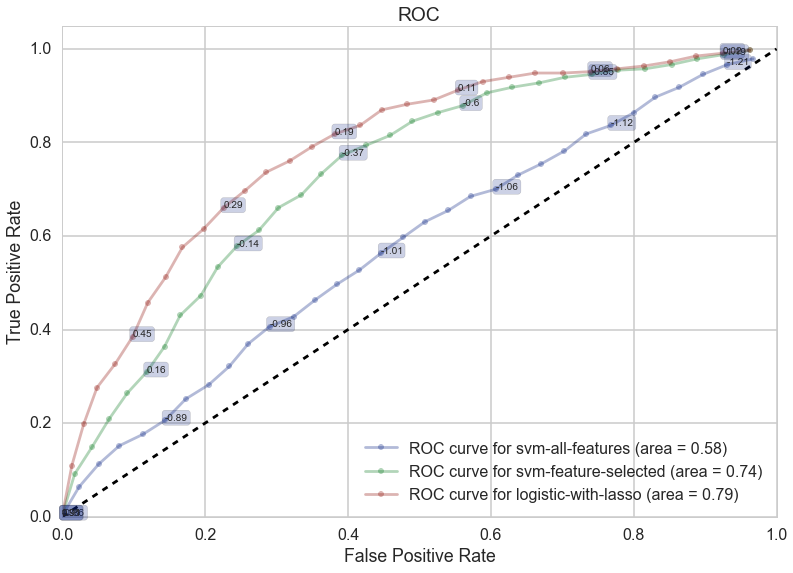

In [243]:
with sns.color_palette("dark"):
    ax=make_roc("svm-all-features",clfsvm, ytest, Xtest, None, labe=250, proba=False, skip=50)
    make_roc("svm-feature-selected",pipelinearsvm, ytest, Xtest, ax, labe=250, proba=False, skip=50);
    make_roc("logistic-with-lasso",clflog, ytest, Xtest, ax, labe=250, proba=True,  skip=50);

In [244]:
# Balance train set to test set

jtrain=np.arange(0, ytrain.shape[0])
n_pos=len(jtrain[ytrain==1])
n_neg=len(jtrain[ytrain==0])
print n_pos, n_neg

860 2894


In [245]:
# balance negative with positive samples in training set (without replacement)
# but there aren't many more negative values, so not sure if it will do anything
ineg = np.random.choice(jtrain[ytrain==0], n_pos, replace=False)

In [246]:

alli=np.concatenate((jtrain[ytrain==1], ineg))
alli.shape

(1720,)

In [247]:
Xtrain_new = Xtrain[alli]
ytrain_new = ytrain[alli]
Xtrain_new.shape, ytrain_new.shape

((1720, 20), (1720,))

In [248]:
reuse_split_new=dict(Xtrain=Xtrain_new, Xtest=Xtest, ytrain=ytrain_new, ytest=ytest)

In [249]:
# Train linear SVM on balanced set
clfsvm_b, _,_,_,_  = do_classify(LinearSVC(loss="hinge"), {"C": [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}, dftouse,lcols, u'RESP',1, reuse_split=reuse_split_new)

using reuse split
BEST PARAMS {'C': 10.0}
############# based on standard predict ################
Accuracy on training data: 0.52
Accuracy on test data:     0.79
[[1253   26]
 [ 315   15]]
########################################################


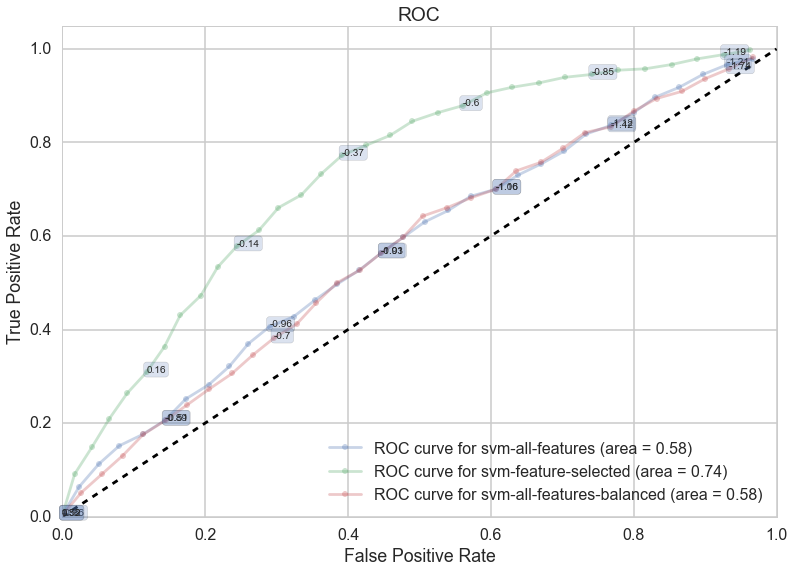

In [250]:
ax = make_roc("svm-all-features",clfsvm, ytest, Xtest, None, labe=250, proba=False, skip=50)
make_roc("svm-feature-selected",pipelinearsvm, ytest, Xtest, ax, labe=250, proba=False, skip=50);
make_roc("svm-all-features-balanced",clfsvm_b, ytest, Xtest, ax, labe=250, proba=False, skip=50);

In [251]:
# running a kernelized SVM
from sklearn.svm import SVC

In [252]:
selectorsvm2 = SelectKBest(k=15, score_func=pearson_scorer)
pipesvm2 = Pipeline([('select2', selectorsvm2), ('svm2', SVC())])

In [253]:
jtrain_new=np.arange(0, ytrain_new.shape[0])
ipos_new = np.random.choice(jtrain_new[ytrain_new==1], 300, replace=False)
ineg_new = np.random.choice(jtrain_new[ytrain_new==0], 300, replace=False)
subsampled_i=np.concatenate((ipos_new,ineg_new))
Xtrain_new2=Xtrain_new[subsampled_i]
ytrain_new2=ytrain_new[subsampled_i]

In [254]:

reuse_split_subsampled=dict(Xtrain=Xtrain_new2, Xtest=Xtest, ytrain=ytrain_new2, ytest=ytest)

In [ ]:
%%time
### This is WRONG it's taking
#your code here
pipesvm2, _,_,_,_  = do_classify(pipesvm2, {"svm2__C": [1e8],
                                              "svm2__gamma":[1e-5, 1e-7, 1e-9]}, 
                                 dftouse,lcols, u'RESP',1, reuse_split=reuse_split_subsampled)

In [ ]:
# Use PCA Analysis to reduce collinearity, from lab 5, classification ipynb 
from sklearn.decomposition import PCA
pca = PCA(n_components=)
X = pca.fit_transform(data)